### $$**Ilham Ramadhan Nur Ahmad**$$

# <font color=blue> STEP 1 : **About Data Set**

8 variabel independen.

$x_1$ : Sumbu Roda

$x_2$ : Panjang

$x_3$ : Lebar

$x_4$ : Tinggi     

$x_5$ : Roda Penggerak RWD

$x_6$ : Silinder

$x_7$ : Ukuran Mesin

$x_8$ : Rasio Bore

$x_9$ : Daya Kuda

Untuk Variable Dependent $y$ adalah Harga Mobil.

**<font color=red> _The dataset is stored in a CSV file called data.csv_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy
from scipy.stats.stats import pearsonr

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('Data_Mobil_Indonesia.csv')
df.head()

,ID_Pelanggan,Level_Risiko,Merek_Mobil,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Unnamed: 26
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN


# <font color=blue> STEP 2 : Cleaning Data & Preparation

In [3]:
df1=df.drop(['JT_Kota','JT_JalanRaya', 'Unnamed: 26'], axis=1)

**Penjelasan**

Drop beberap colomn berikut:
1. ``JT_Kota``

2. ``JT_JalanRaya``

3. ``Index lainnya``
    

In [4]:
brands = df1['Merek_Mobil'].apply(
    lambda x: x.split()[0].lower()) #store value in a variable
df1.insert(1,'brand',brands) #insert in a readable position 

In [5]:
df1.query('brand =="subaru"') 

,ID_Pelanggan,brand,Level_Risiko,Merek_Mobil,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil
138,139,subaru,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,5118.0
139,140,subaru,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,7053.0
140,141,subaru,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,7603.0
141,142,subaru,0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82,4800,7126.0
142,143,subaru,0,subaru brz,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2190,ohcf,four,108,2bbl,3.62,2.64,9.5,82,4400,7775.0
143,144,subaru,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200,9960.0
144,145,subaru,0,subaru r1,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,9233.0
145,146,subaru,0,subaru r2,gas,turbo,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2510,ohcf,four,108,mpfi,3.62,2.64,7.7,111,4800,11259.0
146,147,subaru,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2290,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,7463.0
147,148,subaru,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2455,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200,10198.0


In [6]:
#Checking if there is brands without model (outlier)
brands = df1['Merek_Mobil'].apply(
    lambda x: x.split()) 
for brand in brands:
    if len(brand) ==1:
        print(brand)
#We have two outliers - Index 138 and 141        
df1.query('brand =="subaru" & index in [138,141]') 

#Remove outliers per index
df1.drop(index = [138,141], axis=0, inplace=True)

['subaru']
['subaru']


In [7]:
#Now we can concept merek_mobil column without problems
carname = df1['Merek_Mobil'].apply(
    lambda x: x.split()[1].lower()) #It will take index 1
df1.insert(2,'merek_mobil',carname) #insert in a readable position 
df1.pop('Merek_Mobil') # remove old column

df1.head()

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0
2,3,alfa-romero,quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0
3,4,audi,100,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0


In [8]:
#Fixing writing errors
error_dict = {'maxda':'mazda',
              'porcshce':'porsche',
              'toyouta':'toyota',
              'vw': 'volkswagen', 
              'vokswagen':'volkswagen'}
df1['brand'] = df1['brand'].replace(error_dict)
print(df1['brand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [9]:
# Distinct values from Silinder
print(df1['Silinder'].unique())
parse_dict = {'two':2,'three':3,'four':4,'five': 5, 'six':6, 'eight':8, 'twelve':12}
df1['Silinder'] = df1['Silinder'].replace(parse_dict)
print(df1['Silinder'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
[ 4  6  5  3 12  2  8]


In [10]:
print(df1['Pintu_Mobil'].unique())
df1['Pintu_Mobil'] = df1['Pintu_Mobil'].replace(parse_dict)
print(df1['Pintu_Mobil'].unique())

['two' 'four']
[2 4]


**Penjelasan**
1. Mengganti beberapa kata yang error

    ``maxda = mazda``
    
    ``Nissan = nissan``
    
   ``porsche = porcshce``
   
   ``toyota = toyouta``
   
   ``vokswagen = volkswagen = vw``
   

2. Mengganti colomn ``Silinder`` dari ``str`` menjadi ``int``

3. Menambah colomn baru ``Tipe_Mobil_Dummies`` dengan mengganti colomn ``Tipe_Mobil`` menjadi **Dummies Variable**

In [11]:
df1

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil
0,1,alfa-romero,giulia,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0
1,2,alfa-romero,stelvio,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0
2,3,alfa-romero,quadrifoglio,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0
3,4,audi,100,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo,145e,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,16845.0
201,202,volvo,144ea,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19045.0
202,203,volvo,244dl,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,21485.0
203,204,volvo,246,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,22470.0


# <font color=blue> STEP 3 : Information of Datset

In [12]:
#casting all object columns to string
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = df1[column].astype('string')

In [13]:
#Untuk melihat Row and Columns
print("Shape of Row:", df1.shape[0])
print("Shape of Column:", df1.shape[1]) 

Shape of Row: 203
Shape of Column: 25


In [14]:
df1.isnull().sum()

ID_Pelanggan      0
brand             0
merek_mobil       0
Level_Risiko      0
BBM               0
Tipe_Mobil        0
Pintu_Mobil       0
Badan_Mobil       0
Roda_Penggerak    0
Lokasi_Mesin      0
Sumbu_Roda        0
Panjang           0
Lebar             0
Tinggi            0
Berat             0
Mesin             0
Silinder          0
Ukuran_Mesin      0
Sistem_BBM        0
Rasio_Bore        0
Stroke            0
Kompresi          0
Daya_Kuda         0
RPM               0
Harga_Mobil       0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pelanggan    203 non-null    int64  
 1   brand           203 non-null    string 
 2   merek_mobil     203 non-null    string 
 3   Level_Risiko    203 non-null    int64  
 4   BBM             203 non-null    string 
 5   Tipe_Mobil      203 non-null    string 
 6   Pintu_Mobil     203 non-null    int64  
 7   Badan_Mobil     203 non-null    string 
 8   Roda_Penggerak  203 non-null    string 
 9   Lokasi_Mesin    203 non-null    string 
 10  Sumbu_Roda      203 non-null    float64
 11  Panjang         203 non-null    float64
 12  Lebar           203 non-null    float64
 13  Tinggi          203 non-null    float64
 14  Berat           203 non-null    int64  
 15  Mesin           203 non-null    string 
 16  Silinder        203 non-null    int64  
 17  Ukuran_Mesin    203 non-null    int

In [16]:
df1.head(3)

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil
0,1,alfa-romero,giulia,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0
1,2,alfa-romero,stelvio,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0
2,3,alfa-romero,quadrifoglio,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0


In [17]:
df1.tail(3)

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil
202,203,volvo,244dl,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,21485.0
203,204,volvo,246,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,22470.0
204,205,volvo,264gl,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,22625.0


# <font color=blue> STEP 4 : Explonatory Data Analysis (EDA)

In [18]:
str_column = [column for column in df1.columns if df1[column].dtype == 'string'] # list of all categorical columns
df1_encoded = pd.get_dummies(df1,columns = str_column)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1_encoded_std = pd.DataFrame(scaler.fit_transform(df1_encoded),columns = df1_encoded.columns)
df1_encoded_std.describe()

,ID_Pelanggan,Level_Risiko,Pintu_Mobil,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Silinder,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil,brand_alfa-romero,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,merek_mobil_100,merek_mobil_100ls,merek_mobil_1131,merek_mobil_12tl,merek_mobil_144ea,merek_mobil_145e,merek_mobil_244dl,merek_mobil_245,merek_mobil_246,merek_mobil_264gl,merek_mobil_304,merek_mobil_320i,merek_mobil_4000,merek_mobil_411,merek_mobil_5,merek_mobil_5000,merek_mobil_5000s,merek_mobil_504,merek_mobil_505s,merek_mobil_604sl,merek_mobil_626,merek_mobil_99e,merek_mobil_99gle,merek_mobil_99le,merek_mobil_accord,merek_mobil_baja,merek_mobil_boxter,merek_mobil_brz,merek_mobil_carina,merek_mobil_cayenne,merek_mobil_celica,merek_mobil_century,merek_mobil_challenger,merek_mobil_civic,merek_mobil_clipper,merek_mobil_colt,merek_mobil_corolla,merek_mobil_corona,merek_mobil_coronet,merek_mobil_cougar,merek_mobil_cressida,merek_mobil_cricket,merek_mobil_d-max,merek_mobil_d200,merek_mobil_dart,merek_mobil_dasher,merek_mobil_dayz,merek_mobil_diesel,merek_mobil_dl,merek_mobil_duster,merek_mobil_electra,merek_mobil_fox,merek_mobil_fuga,merek_mobil_fury,merek_mobil_g4,merek_mobil_giulia,merek_mobil_glc,merek_mobil_gt-r,merek_mobil_impala,merek_mobil_juke,merek_mobil_kicks,merek_mobil_lancer,merek_mobil_latio,merek_mobil_leaf,merek_mobil_macan,merek_mobil_mark,merek_mobil_mirage,merek_mobil_model,merek_mobil_monaco,merek_mobil_monte,merek_mobil_montero,merek_mobil_mu-x,merek_mobil_note,merek_mobil_nv200,merek_mobil_opel,merek_mobil_otti,merek_mobil_outlander,merek_mobil_pajero,merek_mobil_panamera,merek_mobil_prelude,merek_mobil_quadrifoglio,merek_mobil_r1,merek_mobil_r2,merek_mobil_rabbit,merek_mobil_rampage,merek_mobil_regal,merek_mobil_rogue,merek_mobil_rx-4,merek_mobil_rx-7,merek_mobil_rx2,merek_mobil_rx3,merek_mobil_satellite,merek_mobil_skyhawk,merek_mobil_skylark,merek_mobil_starlet,merek_mobil_stelvio,merek_mobil_super,merek_mobil_teana,merek_mobil_tercel,merek_mobil_titan,merek_mobil_trezia,merek_mobil_tribeca,merek_mobil_type,merek_mobil_valiant,merek_mobil_vega,merek_mobil_versa,merek_mobil_x1,merek_mobil_x3,merek_mobil_x4,merek_mobil_x5,merek_mobil_xf,merek_mobil_xj,merek_mobil_xk,merek_mobil_z4,BBM_diesel,BBM_gas,Tipe_Mobil_std,Tipe_Mobil_turbo,Badan_Mobil_convertible,Badan_Mobil_hardtop,Badan_Mobil_hatchback,Badan_Mobil_sedan,Badan_Mobil_wagon,Roda_Penggerak_4wd,Roda_Penggerak_fwd,Roda_Penggerak_rwd,Lokasi_Mesin_front,Lokasi_Mesin_rear,Mesin_dohc,Mesin_dohcv,Mesin_l,Mesin_ohc,Mesin_ohcf,Mesin_ohcv,Mesin_rotor,Sistem_BBM_1bbl,Sistem_BBM_2bbl,Sistem_BBM_4bbl,Sistem_BBM_idi,Sistem_BBM_mfi,Sistem_BBM_mpfi,Sistem_BBM_spdi,Sistem_BBM_spfi
count,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,203.000000,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,2.030000e+02,

In [20]:
df1_encoded.describe() #Descriptive Statistics

,ID_Pelanggan,Level_Risiko,Pintu_Mobil,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Silinder,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil,brand_alfa-romero,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,merek_mobil_100,merek_mobil_100ls,merek_mobil_1131,merek_mobil_12tl,merek_mobil_144ea,merek_mobil_145e,merek_mobil_244dl,merek_mobil_245,merek_mobil_246,merek_mobil_264gl,merek_mobil_304,merek_mobil_320i,merek_mobil_4000,merek_mobil_411,merek_mobil_5,merek_mobil_5000,merek_mobil_5000s,merek_mobil_504,merek_mobil_505s,merek_mobil_604sl,merek_mobil_626,merek_mobil_99e,merek_mobil_99gle,merek_mobil_99le,merek_mobil_accord,merek_mobil_baja,merek_mobil_boxter,merek_mobil_brz,merek_mobil_carina,merek_mobil_cayenne,merek_mobil_celica,merek_mobil_century,merek_mobil_challenger,merek_mobil_civic,merek_mobil_clipper,merek_mobil_colt,merek_mobil_corolla,merek_mobil_corona,merek_mobil_coronet,merek_mobil_cougar,merek_mobil_cressida,merek_mobil_cricket,merek_mobil_d-max,merek_mobil_d200,merek_mobil_dart,merek_mobil_dasher,merek_mobil_dayz,merek_mobil_diesel,merek_mobil_dl,merek_mobil_duster,merek_mobil_electra,merek_mobil_fox,merek_mobil_fuga,merek_mobil_fury,merek_mobil_g4,merek_mobil_giulia,merek_mobil_glc,merek_mobil_gt-r,merek_mobil_impala,merek_mobil_juke,merek_mobil_kicks,merek_mobil_lancer,merek_mobil_latio,merek_mobil_leaf,merek_mobil_macan,merek_mobil_mark,merek_mobil_mirage,merek_mobil_model,merek_mobil_monaco,merek_mobil_monte,merek_mobil_montero,merek_mobil_mu-x,merek_mobil_note,merek_mobil_nv200,merek_mobil_opel,merek_mobil_otti,merek_mobil_outlander,merek_mobil_pajero,merek_mobil_panamera,merek_mobil_prelude,merek_mobil_quadrifoglio,merek_mobil_r1,merek_mobil_r2,merek_mobil_rabbit,merek_mobil_rampage,merek_mobil_regal,merek_mobil_rogue,merek_mobil_rx-4,merek_mobil_rx-7,merek_mobil_rx2,merek_mobil_rx3,merek_mobil_satellite,merek_mobil_skyhawk,merek_mobil_skylark,merek_mobil_starlet,merek_mobil_stelvio,merek_mobil_super,merek_mobil_teana,merek_mobil_tercel,merek_mobil_titan,merek_mobil_trezia,merek_mobil_tribeca,merek_mobil_type,merek_mobil_valiant,merek_mobil_vega,merek_mobil_versa,merek_mobil_x1,merek_mobil_x3,merek_mobil_x4,merek_mobil_x5,merek_mobil_xf,merek_mobil_xj,merek_mobil_xk,merek_mobil_z4,BBM_diesel,BBM_gas,Tipe_Mobil_std,Tipe_Mobil_turbo,Badan_Mobil_convertible,Badan_Mobil_hardtop,Badan_Mobil_hatchback,Badan_Mobil_sedan,Badan_Mobil_wagon,Roda_Penggerak_4wd,Roda_Penggerak_fwd,Roda_Penggerak_rwd,Lokasi_Mesin_front,Lokasi_Mesin_rear,Mesin_dohc,Mesin_dohcv,Mesin_l,Mesin_ohc,Mesin_ohcf,Mesin_ohcv,Mesin_rotor,Sistem_BBM_1bbl,Sistem_BBM_2bbl,Sistem_BBM_4bbl,Sistem_BBM_idi,Sistem_BBM_mfi,Sistem_BBM_mpfi,Sistem_BBM_spdi,Sistem_BBM_spfi
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000

**Penjelasan**

Berdasarkan deskriptif diatas,

Statistik yang dihasilkan oleh df1.describe() tergantung pada tipe data pada kolom yang sedang diproses. Jika kolom berisi **data numerik**, maka statistik yang dihasilkan adalah ``mean (rata-rata)``, ``standard deviation (deviasi standar)``, ``quartiles (kuartil)``, ``minimum``, dan ``maximum``.

**Detail**

``Count``: Jumlah data yang tersedia pada kolom. Jika ada nilai kosong (NaN), maka data tersebut tidak dihitung pada jumlah data.

``Mean``: Rata-rata dari seluruh data pada kolom.

``Std``: Standar deviasi dari seluruh data pada kolom. Standar deviasi mengukur seberapa jauh data tersebar dari rata-rata.

``Min``: Nilai terkecil dari seluruh data pada kolom.

``25%``: Kuartil pertama (25% dari data terkecil) dari seluruh data pada kolom.

``50%``: Median (nilai tengah) dari seluruh data pada kolom.

``75%``: Kuartil ketiga (75% dari data terbesar) dari seluruh data pada kolom.

``Max``: Nilai terbesar dari seluruh data pada kolom.

Sedangkan jika kolom berisi **data kategori atau string**, maka statistik yang dihasilkan adalah ``jumlah data``, ``jumlah kategori unik``, ``kategori yang paling sering muncul``, dan ``jumlah kategori yang paling sering muncul``.

## <font color=red>Data Visualization

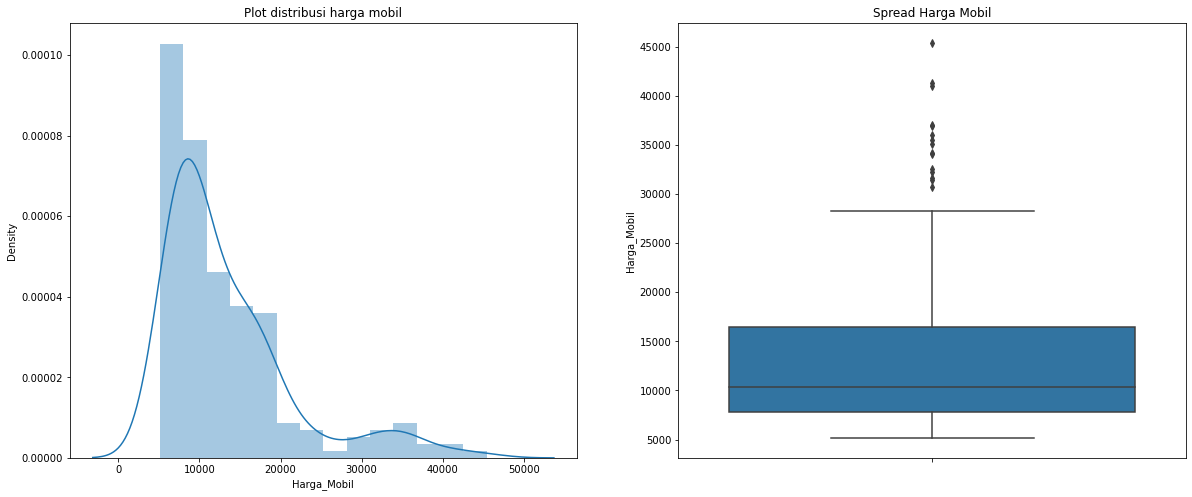

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Plot distribusi harga mobil')
sns.distplot(df1.Harga_Mobil)

plt.subplot(1,2,2)
plt.title('Spread Harga Mobil')
sns.boxplot(y=df1.Harga_Mobil)

plt.show()

**Penjelasan:**
1. Dapat diasumsikan Plotnya miring ke kanan (**Right Skew**), artinya sebagian besar harga dalam dataset rendah **(Di bawah 15.000)**.
2. Ada perbedaan yang signifikan antara rata-rata dan median distribusi harga.

Text(0, 0.5, 'Jumlah')

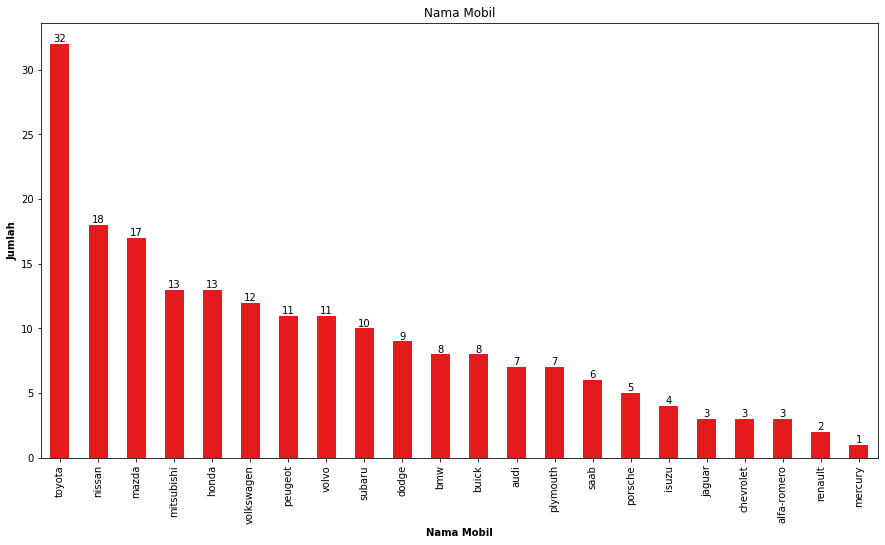

In [22]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df1['brand'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.bar_label(ax.containers[0])
ax.title.set_text('Nama Mobil')
plt.xlabel("Nama Mobil",fontweight = 'bold')
plt.ylabel("Jumlah",fontweight = 'bold')

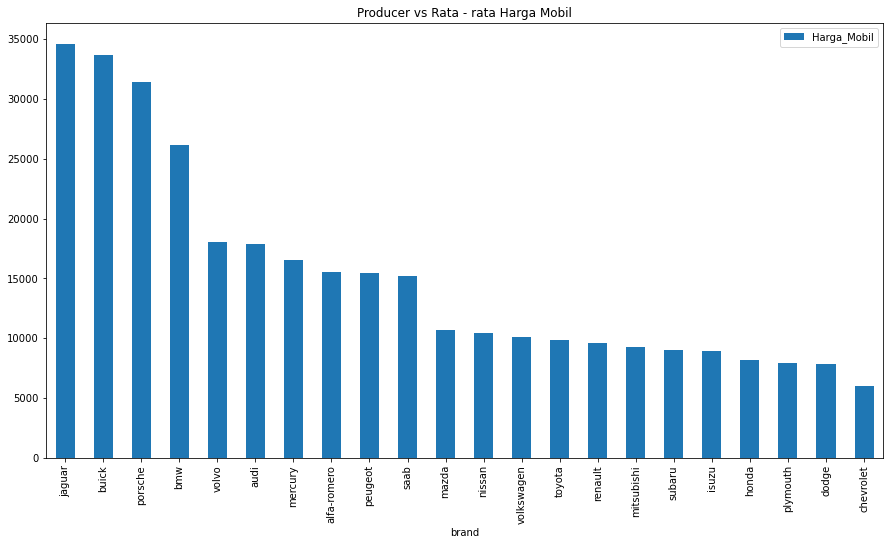

In [23]:
Meanprice = pd.DataFrame(df1.groupby(['brand'])['Harga_Mobil'].mean().sort_values(ascending = False))
Meanprice.plot.bar()
plt.title('Producer vs Rata - rata Harga Mobil')
plt.show()

**Penjelasan**

1. Jenis mobil ``Toyota`` dan ``nissan`` paling banyak dimininati dengan jumlah **32 dan 18**
2. ``Jaguar`` dan ``Buick`` memiliki harga yang paling tinggi.

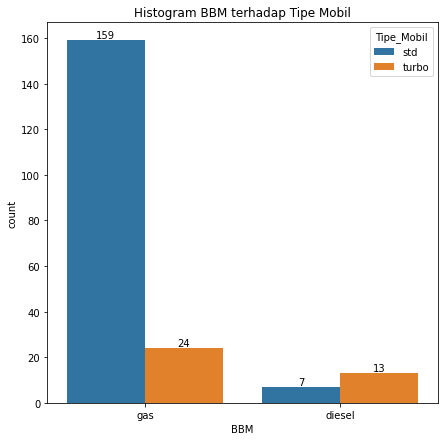

In [24]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=df1, x='BBM', hue='Tipe_Mobil')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Histogram BBM terhadap Tipe Mobil')
plt.show()

**Penjelasan**

1. Pada jenis ``BBM`` **gas** mendominasi dari pada **diesel** dari segi penggunaan pada mobil.
2. Jenis ``BBM`` **gas** paling banyak digunkan pada ``Tipe Mobil`` **std** dari pada **turbo**.

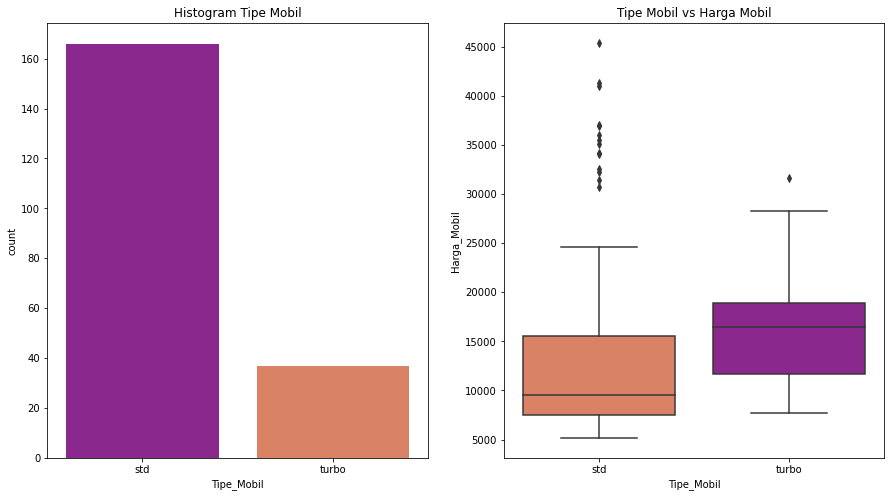

In [25]:
plt.subplot(1,2,1)
plt.title('Histogram Tipe Mobil')
sns.countplot(df1.Tipe_Mobil, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Tipe Mobil vs Harga Mobil')
sns.boxplot(x=df1.Tipe_Mobil, y=df1.Harga_Mobil, palette=("plasma_r"))

plt.show()

**Penjelasan**

1. ``Tipe Mobil`` dengan jenis **turbo** memiliki kisaran harga yang lebih tinggi daripada **std** (meskipun memiliki beberapa nilai tinggi di luar range.)

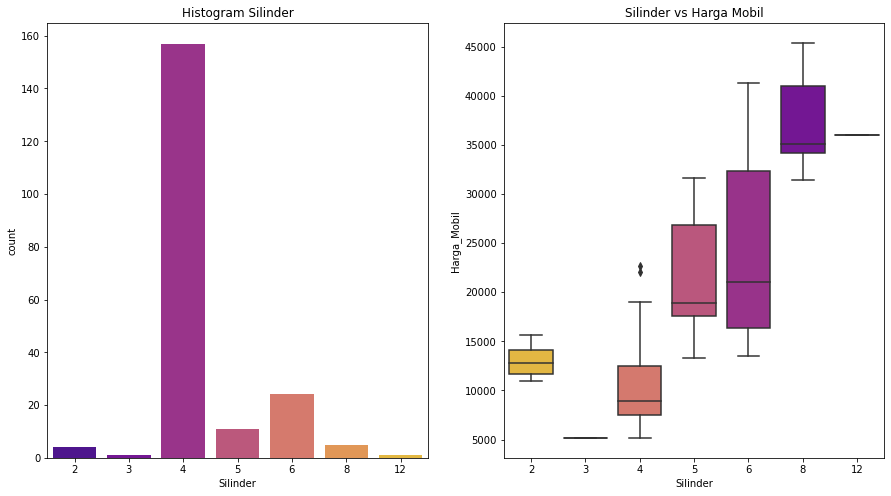

In [26]:
plt.subplot(1,2,1)
plt.title('Histogram Silinder')
sns.countplot(df1.Silinder, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Silinder vs Harga Mobil')
sns.boxplot(x=df1.Silinder, y=df1.Harga_Mobil, palette=("plasma_r"))

plt.show()

**Penjelasan**
1. Jumlah ``silinder`` yang paling umum adalah **empat, enam dan lima**. 
2. Untuk delapan ``silinder`` memiliki kisaran **harga tertinggi**.

**Note:**
Jumlah silinder pada mobil bervariasi tergantung pada jenis mobil dan mesin yang digunakan. Umumnya mobil menggunakan konfigurasi in-line 4 cylinder, artinya terdapat 4 buah tabung silinder yang diletakkan secara segaris. Untuk jumlah silinder, pada umumnya hanya sampai pada angka 6 saja (*daihatsu.co.id & autofun.co.id*)

In [27]:
def pairplot(x_axis,y_axis) :
    sns.pairplot(df1,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

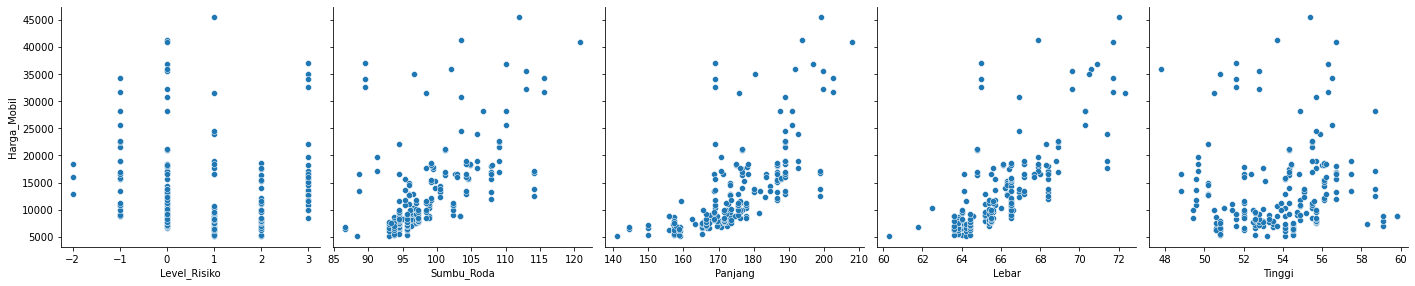

In [28]:
y_vars=['Harga_Mobil']
x_vars=['Level_Risiko','Sumbu_Roda','Panjang','Lebar','Tinggi']
pairplot(x_vars,y_vars)

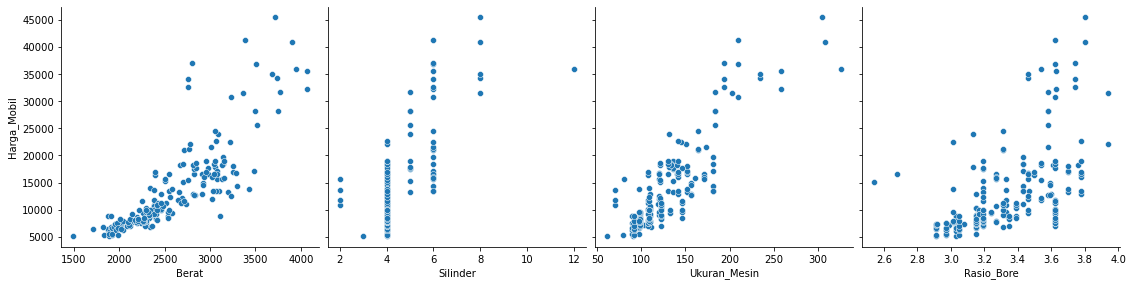

In [29]:
x_vars=['Berat','Silinder','Ukuran_Mesin','Rasio_Bore']
pairplot(x_vars,y_vars)

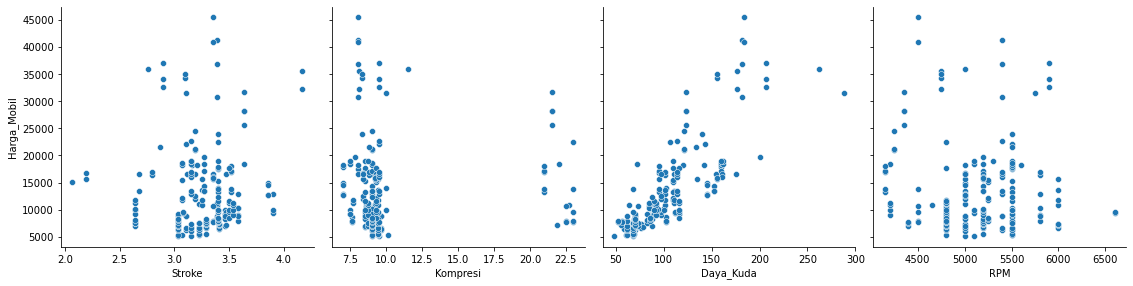

In [30]:
x_vars=['Stroke','Kompresi','Daya_Kuda','RPM']
pairplot(x_vars,y_vars)

In [31]:
df1.corr()

,ID_Pelanggan,Level_Risiko,Pintu_Mobil,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Silinder,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil
ID_Pelanggan,1.000000,-0.153056,0.192217,0.133613,0.176558,0.056983,0.258293,0.077901,-0.092530,-0.030409,0.255316,-0.150693,0.152009,-0.010567,-0.200893,-0.104148
Level_Risiko,-0.153056,1.000000,-0.661474,-0.531683,-0.354634,-0.229876,-0.544743,-0.227432,-0.113103,-0.104503,-0.132650,-0.002115,-0.178352,0.073560,0.274903,-0.078380
Pintu_Mobil,0.192217,-0.661474,1.000000,0.446927,0.395493,0.203459,0.557470,0.197168,-0.016530,0.018858,0.121864,-0.019072,0.177940,-0.130456,-0.249012,0.029780
Sumbu_Roda,0.133613,-0.531683,0.446927,1.000000,0.874511,0.794298,0.590235,0.775828,0.338447,0.567863,0.498363,0.151439,0.248927,0.350515,-0.364621,0.576020
Panjang,0.176558,-0.354634,0.395493,0.874511,1.000000,0.839916,0.493226,0.878048,0.430308,0.682573,0.621244,0.112209,0.157108,0.550222,-0.292972,0.681318
Lebar,0.056983,-0.229876,0.203459,0.794298,0.839916,1.000000,0.279709,0.866894,0.544807,0.734644,0.571867,0.169840,0.179959,0.638929,-0.224719,0.758250
Tinggi,0.258293,-0.544743,0.557470,0.590235,0.493226,0.279709,1.000000,0.294890,-0.014905,0.066142,0.174889,-0.062245,0.261029,-0.110609,-0.322873,0.117922
Berat,0.077901,-0.227432,0.197168,0.775828,0.878048,0.866894,0.294890,1.000000,0.609397,0.850183,0.664162,0.152585,0.149970,0.749232,-0.272694,0.833997
Silinder,-0.092530,-0.113103,-0.016530,0.338447,0.430308,0.544807,-0.014905,0.609397,1.000000,0.846019,0.236627,-0.000192,-0.020803,0.691805,-0.126475,0.718537
Ukuran_Mesin,-0.030409,-0.104503,0.018858,0.567863,0.682573,0.734644,0.066142,0.850183,0.846019,1.000000,0.594438,0.194784,0.027643,0.809006,-0.248738,0.873886


**Penjelasan**
pada plot diatas menjelaskan **korelasi** antara ``Harga Mobil`` dan faktor independennya.
1. variabel independen yang asumsinya memiliki korelasi positive adalah ``Sumbu Roda``, ``Panjang``,``Lebar``,``Berat``,``Ukuran Mesin``, ``Rasio Bore``,``Daya Kuda``.
2. ada beberapa variable independen yang asumsinya tidak korelasi positif akan tetapi koefesien korelasi berada diatas 70% yaitu ``Silinder``

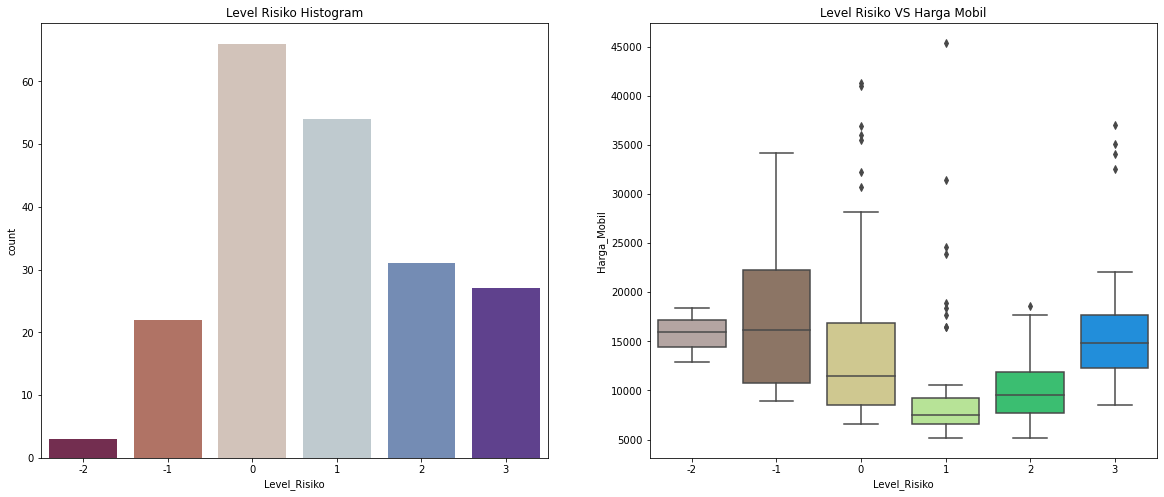

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Level Risiko Histogram')
sns.countplot(df1.Level_Risiko, palette=("twilight_shifted_r"))

plt.subplot(1,2,2)
plt.title('Level Risiko VS Harga Mobil')
sns.boxplot(x=df1.Level_Risiko, y=df1.Harga_Mobil, palette=("terrain_r"))

plt.show()

**Penjelasan:**
1. ``Level risiko`` dengan nilai **0** dan **1** memiliki jumlah yang tinggi (yaitu paling banyak dijual.)
2. Mobil - mobil dengan ``level risiko`` **-1** tampaknya dihargai tinggi (karena masuk akal juga, peringkat risiko asuransi **-1** cukup baik). Tetapi tampaknya ``level risiko`` dengan nilai **3** memiliki kisaran harga yang mirip dengan nilai **-2**. Ada penurunan harga pada simbol **1**.

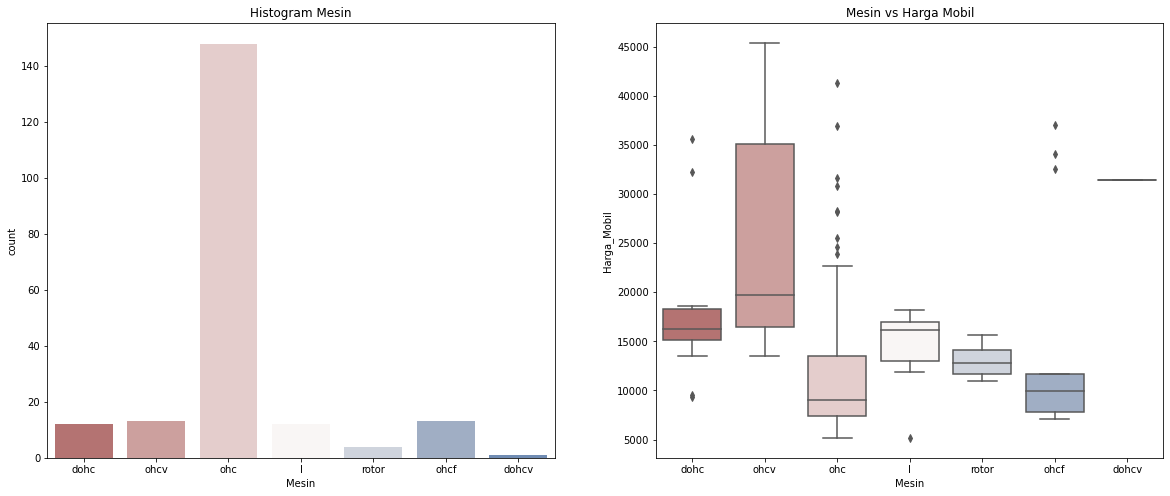

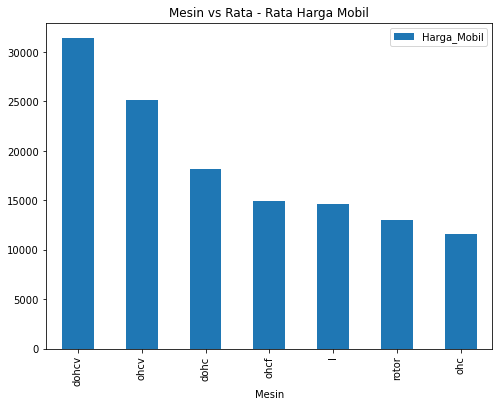

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram Mesin')
sns.countplot(df1.Mesin, palette=("vlag_r"))

plt.subplot(1,2,2)
plt.title('Mesin vs Harga Mobil')
sns.boxplot(x=df1.Mesin, y=df1.Harga_Mobil, palette=("vlag_r"))

plt.show()

tipe_mesin = pd.DataFrame(df1.groupby(['Mesin'])['Harga_Mobil'].mean().sort_values(ascending = False))
tipe_mesin.plot.bar(figsize=(8,6))
plt.title('Mesin vs Rata - Rata Harga Mobil')
plt.show()

**Penjelasan:**
1. Jenis Mesin **ohc** tampaknya menjadi tipe yang paling disukai.
2. **OHCV** memiliki kisaran harga tertinggi.
3. **OHC, rotor, dan OHCF** memiliki kisaran harga yang rendah.

# <font color=blue> STEP 5 : Correlation

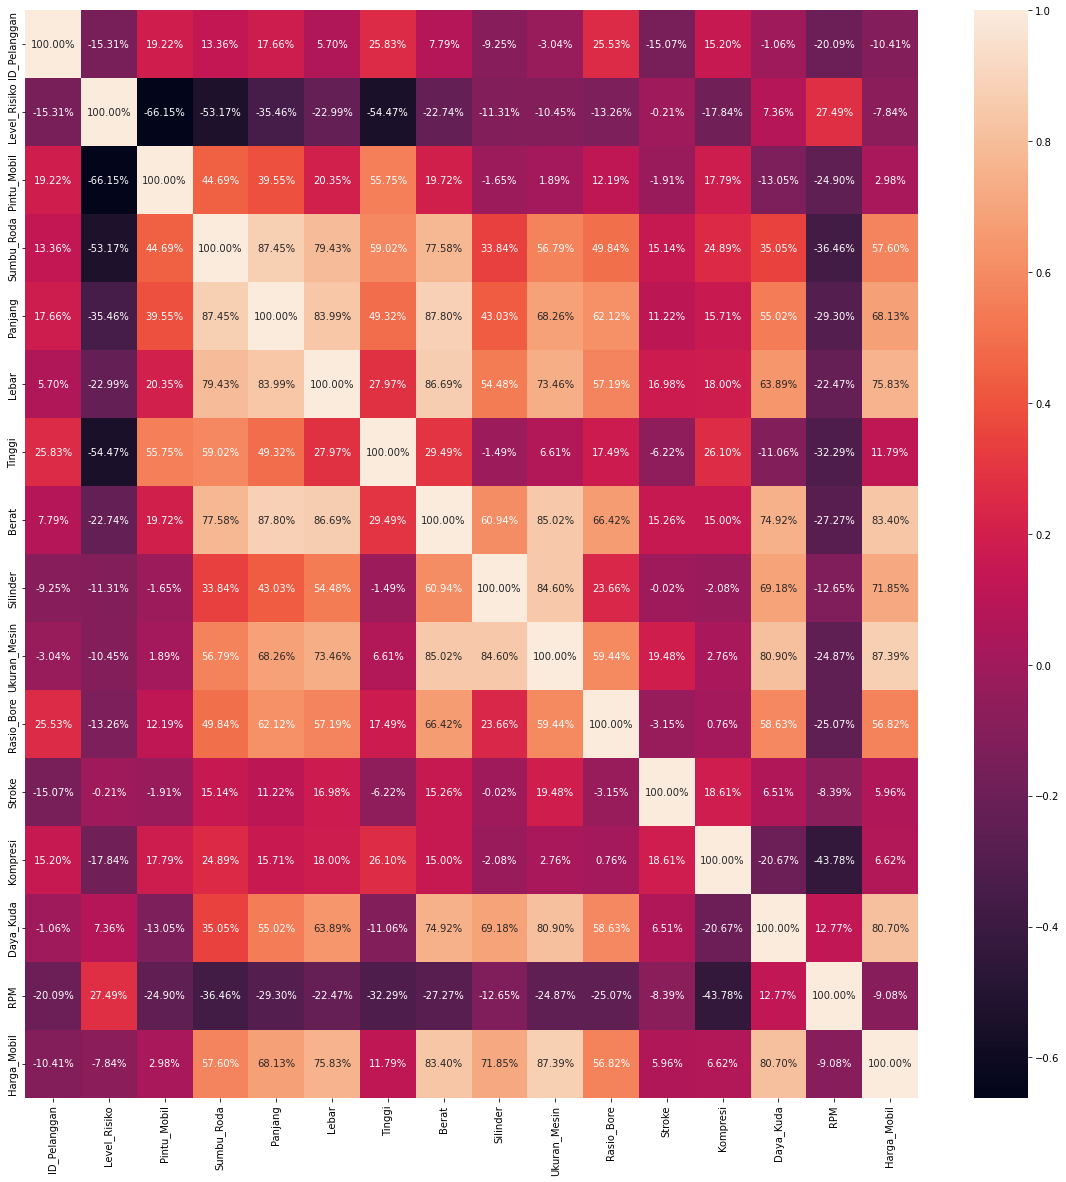

In [34]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, fmt='.2%')
plt.show()

# STEP 7 : Modeling

In [35]:
X = np.array(df1_encoded_std.loc[:, df1_encoded_std.columns != 'Harga_Mobil'].values)
Y = np.array(df1_encoded_std['Harga_Mobil'].values)

In [36]:
LR=LinearRegression()
model = LR.fit(X, Y)  #create model dari LR dari X dan y (berdasarkan data yang dimiliki)

In [37]:
df2 = df1.copy()
H = model.predict(X)
df2['Estimated Harga Mobil'] = H   #[] - Di data frame, memilih kolom atau menambah
df2

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil,Estimated Harga Mobil
0,1,alfa-romero,giulia,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,0.088167
1,2,alfa-romero,stelvio,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,0.317659
2,3,alfa-romero,quadrifoglio,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,0.371370
3,4,audi,100,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,0.033968
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,0.560335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo,145e,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,0.426546
201,202,volvo,144ea,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,0.644319
202,203,volvo,244dl,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,1.147249
203,204,volvo,246,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,22470.0,1.083773


In [38]:
df2['Residual'] = df2['Harga_Mobil'] - df2['Estimated Harga Mobil'] #residual = actual - estimated ---> u = y - yhead
df2

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil,Estimated Harga Mobil,Residual
0,1,alfa-romero,giulia,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,0.088167,13494.911833
1,2,alfa-romero,stelvio,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,0.317659,16499.682341
2,3,alfa-romero,quadrifoglio,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,0.371370,16499.628630
3,4,audi,100,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,0.033968,13949.966032
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,0.560335,17449.439665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo,145e,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,0.426546,16844.573454
201,202,volvo,144ea,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,0.644319,19044.355681
202,203,volvo,244dl,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,1.147249,21483.852751
203,204,volvo,246,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,22470.0,1.083773,22468.916227


In [39]:
np.sum(df2['Residual'])  #seharusnya nilai yang dihasilkan mendekati 0   #np.sum(df['Residual'])

2709481.7902929736

In [40]:
df2["Residual Square"]=df2["Residual"]**2
df2

,ID_Pelanggan,brand,merek_mobil,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Mesin,Silinder,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil,Estimated Harga Mobil,Residual,Residual Square
0,1,alfa-romero,giulia,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,0.088167,13494.911833,1.821126e+08
1,2,alfa-romero,stelvio,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,0.317659,16499.682341,2.722395e+08
2,3,alfa-romero,quadrifoglio,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,0.371370,16499.628630,2.722377e+08
3,4,audi,100,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,0.033968,13949.966032,1.946016e+08
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,0.560335,17449.439665,3.044829e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo,145e,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,0.426546,16844.573454,2.837397e+08
201,202,volvo,144ea,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,0.644319,19044.355681,3.626875e+08
202,203,volvo,244dl,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,1.147249,21483.852751,4.615559e+08
203,204,volvo,246,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,22470.0,1.083773,22468.916227,5.048522e+08


# <font color=blue>STEP 8: Machine Learning - Split Data

In [41]:
x = np.array(df1_encoded_std.loc[:, df1_encoded_std.columns != 'Harga_Mobil'].values)
y = np.array(df1_encoded_std['Harga_Mobil'].values)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(
    x,y, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle=True)

from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()


line_fitter.fit(x_train, y_train)

print("Train score:")
print(line_fitter.score(x_train, y_train))

print("Test score:")
print(line_fitter.score(x_test, y_test))

Train score:
0.9967271844723753
Test score:
-3.7127959020969074e+26


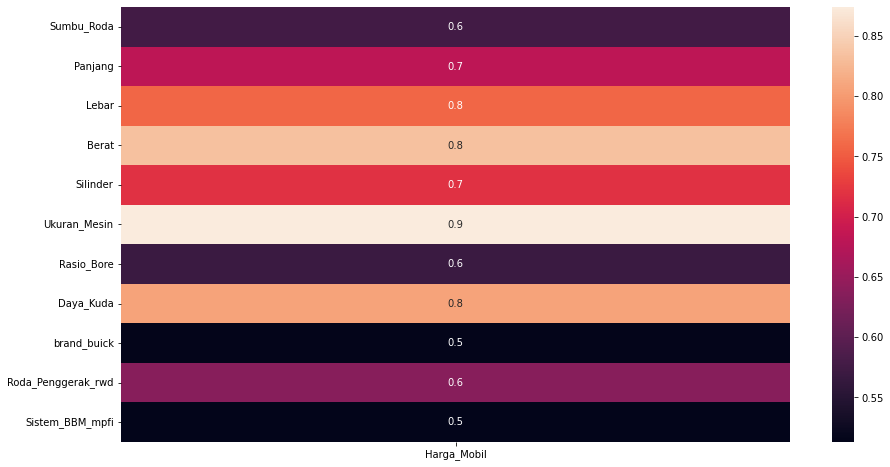

In [42]:
corr_matrix = df1_encoded_std.corr()

#let's isolate price column and remove price row
corr_harga = corr_matrix[['Harga_Mobil']].drop(labels=['Harga_Mobil']).query("(Harga_Mobil)>0.5")
sns.heatmap(corr_harga, annot = True,fmt=".1f");

In [43]:
# Building our lean model!
x = np.array(df1_encoded_std[[
                                                      'Sumbu_Roda',
                                                      'Panjang',
                                                      'Lebar',
                                                      'Tinggi',
                                                      'Berat',
                                                      'Silinder',
                                                      'Ukuran_Mesin',
                                                      'Rasio_Bore',
                                                      'Daya_Kuda',
                                                      'Roda_Penggerak_rwd',
                                                      
                                                     ]].values)
x_train, x_test, y_train,y_test = train_test_split(
    x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

line_fitter.fit(x_train, y_train)


print("Train score:")
print(line_fitter.score(x_train, y_train))

print("Test score:")
print(line_fitter.score(x_test, y_test))

Train score:
0.8415754354671043
Test score:
0.8200742565899897


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_vif = df1_encoded_std[[
                            'Sumbu_Roda',
                            'Panjang',
                            'Lebar',
                            'Tinggi',
                            'Berat',
                            'Silinder',
                            'Ukuran_Mesin',
                            'Rasio_Bore',
                            'Daya_Kuda',
                            'Roda_Penggerak_rwd',
                            ]]

vif_data = pd.DataFrame()
vif_data["feature"] = x_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]
  
vif_data

,feature,VIF
0,Sumbu_Roda,7.525930
1,Panjang,8.498715
2,Lebar,5.949193
3,Tinggi,2.433847
4,Berat,13.640700
5,Silinder,6.919584
6,Ukuran_Mesin,14.163880
7,Rasio_Bore,3.130510
8,Daya_Kuda,4.837597
9,Roda_Penggerak_rwd,2.343846


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_vif = df1_encoded_std[[
                            'Sumbu_Roda',
                            'Panjang',
                            'Lebar',
                            'Tinggi',
                            #'Berat',
                            'Silinder',
                            #'Ukuran_Mesin',
                            'Rasio_Bore',
                            'Daya_Kuda',
                            'Roda_Penggerak_rwd',
                            ]]

vif_data = pd.DataFrame()
vif_data["feature"] = x_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]
  
vif_data

,feature,VIF
0,Sumbu_Roda,7.192530
1,Panjang,7.192683
2,Lebar,5.365962
3,Tinggi,2.206782
4,Silinder,2.332844
5,Rasio_Bore,2.349124
6,Daya_Kuda,4.303603
7,Roda_Penggerak_rwd,2.069024


``VIF`` **(Variance Inflation Factor)** adalah ukuran untuk mengevaluasi multikolinearitas dalam model regresi linear. Jika nilai VIF di atas 10, maka dapat dianggap bahwa terdapat multikolinearitas yang signifikan dalam model.

In [46]:
X1 = df1_encoded[['Sumbu_Roda','Panjang','Lebar','Tinggi','Silinder','Rasio_Bore','Daya_Kuda','Roda_Penggerak_rwd']]
y1 = df1_encoded["Harga_Mobil"]


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

print("Shape of X_train:", X1_train.shape)
print("Shape of X_test:", X1_test.shape)
print("Shape of y_train:", y1_train.shape)
print("Shape of y_test:", y1_test.shape)

Shape of X_train: (142, 8)
Shape of X_test: (61, 8)
Shape of y_train: (142,)
Shape of y_test: (61,)


In [47]:
model = LinearRegression()
model.fit(X1_train,y1_train)
print("Intercept:",model.intercept_)
model_coefs = pd.DataFrame({'Feature/Column': list(X1.columns), 'Coefficient': model.coef_})
print(model_coefs)

Intercept: -83680.56881392846
       Feature/Column  Coefficient
0          Sumbu_Roda    31.550650
1             Panjang    16.480432
2               Lebar  1041.012282
3              Tinggi   138.739126
4            Silinder  1497.849847
5          Rasio_Bore   292.719717
6           Daya_Kuda    58.691771
7  Roda_Penggerak_rwd  3619.931689


**Penjelasan**

**Data Frame** diatas menjelaskan tentang koefesien dari train data seberapa significant variable independentnya terhadap depedentnya.

### <font color=fanta>OLS Dataset Train

In [48]:
X_trains = sm.add_constant(x_train)
olstrain = sm.OLS(y_train, x_train).fit()

#Summary of linear model
print(olstrain.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              70.01
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                    7.82e-48
Time:                        08:06:23   Log-Likelihood:                         -66.275
No. Observations:                 142   AIC:                                      152.6
Df Residuals:                     132   BIC:                                      182.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### <font color=fanta>OLS Dataset

In [49]:
X = sm.add_constant(df1_encoded_std[['Sumbu_Roda','Panjang','Lebar','Tinggi','Silinder','Rasio_Bore','Daya_Kuda','Roda_Penggerak_rwd']].to_numpy())
Y = df1_encoded_std['Harga_Mobil'].to_numpy()
LR = sm.OLS(Y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     104.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.45e-66
Time:                        08:06:23   Log-Likelihood:                -118.42
No. Observations:                 203   AIC:                             254.8
Df Residuals:                     194   BIC:                             284.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.874e-16      0.031   6.02e-15      1.0

# Uji Asumsi Klasik

## <font color=fanta> Normality

p_value: 2.5079067025182125e-05


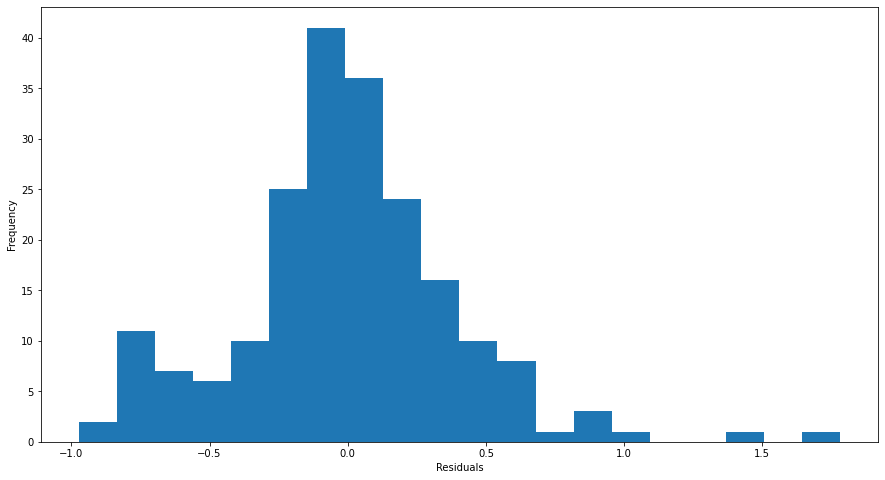

In [50]:
import statsmodels.api as sm
import scipy.stats as stats
results = sm.OLS(y, x).fit()
residuals = results.resid
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

test_stat, p_value = stats.normaltest(residuals)
print(f'p_value: {p_value}')

## <font color=fanta> Heterocedasticity

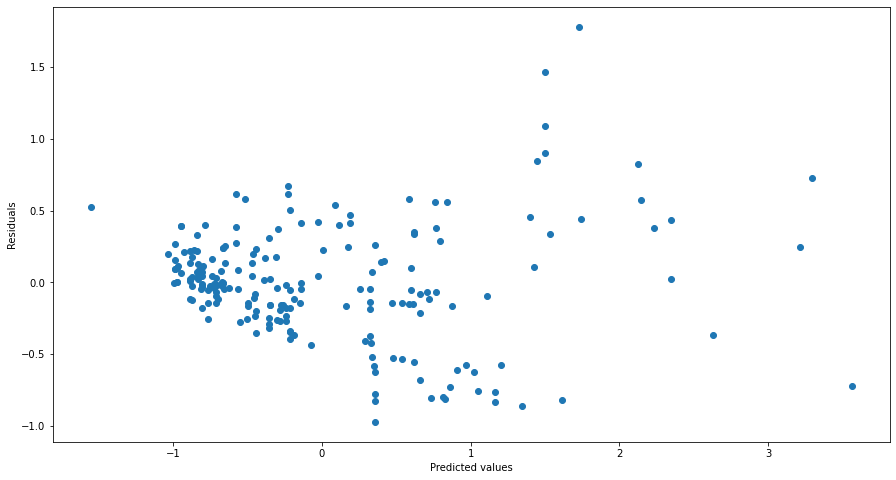

In [51]:
plt.scatter(results.predict(), residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

In [52]:
df1_encoded

,ID_Pelanggan,Level_Risiko,Pintu_Mobil,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Silinder,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,Harga_Mobil,brand_alfa-romero,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,merek_mobil_100,merek_mobil_100ls,merek_mobil_1131,merek_mobil_12tl,merek_mobil_144ea,merek_mobil_145e,merek_mobil_244dl,merek_mobil_245,merek_mobil_246,merek_mobil_264gl,merek_mobil_304,merek_mobil_320i,merek_mobil_4000,merek_mobil_411,merek_mobil_5,merek_mobil_5000,merek_mobil_5000s,merek_mobil_504,merek_mobil_505s,merek_mobil_604sl,merek_mobil_626,merek_mobil_99e,merek_mobil_99gle,merek_mobil_99le,merek_mobil_accord,merek_mobil_baja,merek_mobil_boxter,merek_mobil_brz,merek_mobil_carina,merek_mobil_cayenne,merek_mobil_celica,merek_mobil_century,merek_mobil_challenger,merek_mobil_civic,merek_mobil_clipper,merek_mobil_colt,merek_mobil_corolla,merek_mobil_corona,merek_mobil_coronet,merek_mobil_cougar,merek_mobil_cressida,merek_mobil_cricket,merek_mobil_d-max,merek_mobil_d200,merek_mobil_dart,merek_mobil_dasher,merek_mobil_dayz,merek_mobil_diesel,merek_mobil_dl,merek_mobil_duster,merek_mobil_electra,merek_mobil_fox,merek_mobil_fuga,merek_mobil_fury,merek_mobil_g4,merek_mobil_giulia,merek_mobil_glc,merek_mobil_gt-r,merek_mobil_impala,merek_mobil_juke,merek_mobil_kicks,merek_mobil_lancer,merek_mobil_latio,merek_mobil_leaf,merek_mobil_macan,merek_mobil_mark,merek_mobil_mirage,merek_mobil_model,merek_mobil_monaco,merek_mobil_monte,merek_mobil_montero,merek_mobil_mu-x,merek_mobil_note,merek_mobil_nv200,merek_mobil_opel,merek_mobil_otti,merek_mobil_outlander,merek_mobil_pajero,merek_mobil_panamera,merek_mobil_prelude,merek_mobil_quadrifoglio,merek_mobil_r1,merek_mobil_r2,merek_mobil_rabbit,merek_mobil_rampage,merek_mobil_regal,merek_mobil_rogue,merek_mobil_rx-4,merek_mobil_rx-7,merek_mobil_rx2,merek_mobil_rx3,merek_mobil_satellite,merek_mobil_skyhawk,merek_mobil_skylark,merek_mobil_starlet,merek_mobil_stelvio,merek_mobil_super,merek_mobil_teana,merek_mobil_tercel,merek_mobil_titan,merek_mobil_trezia,merek_mobil_tribeca,merek_mobil_type,merek_mobil_valiant,merek_mobil_vega,merek_mobil_versa,merek_mobil_x1,merek_mobil_x3,merek_mobil_x4,merek_mobil_x5,merek_mobil_xf,merek_mobil_xj,merek_mobil_xk,merek_mobil_z4,BBM_diesel,BBM_gas,Tipe_Mobil_std,Tipe_Mobil_turbo,Badan_Mobil_convertible,Badan_Mobil_hardtop,Badan_Mobil_hatchback,Badan_Mobil_sedan,Badan_Mobil_wagon,Roda_Penggerak_4wd,Roda_Penggerak_fwd,Roda_Penggerak_rwd,Lokasi_Mesin_front,Lokasi_Mesin_rear,Mesin_dohc,Mesin_dohcv,Mesin_l,Mesin_ohc,Mesin_ohcf,Mesin_ohcv,Mesin_rotor,Sistem_BBM_1bbl,Sistem_BBM_2bbl,Sistem_BBM_4bbl,Sistem_BBM_idi,Sistem_BBM_mfi,Sistem_BBM_mpfi,Sistem_BBM_spdi,Sistem_BBM_spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0